In [3]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [7]:
centers  = [[1 , 1 ] , [-1 , 1] , [-1,-1]]

X , y = make_blobs(n_samples=750 ,  centers=centers, cluster_std=0.4,
                  random_state=0)

scaler  = StandardScaler()

X_standard = scaler.fit_transform(X)

df = pd.DataFrame({ "f1" : X_standard[:,0] , "f2" : X_standard[: , 1]})
df.head()

,f1,f2
0,1.166043,0.808121
1,-0.805996,0.463183
2,1.006316,0.392947
3,-1.195930,-1.714336
4,1.810445,1.134242


In [10]:
db  = DBSCAN(eps=0.3, min_samples=10)

db.fit(df)

cluster = db.labels_

In [11]:
df["clusters"]  = cluster

df.head()

,f1,f2,clusters
0,1.166043,0.808121,0
1,-0.805996,0.463183,1
2,1.006316,0.392947,0
3,-1.195930,-1.714336,2
4,1.810445,1.134242,0


In [12]:
df.clusters.value_counts()

clusters
 2    246
 0    243
 1    243
-1     18
Name: count, dtype: int64

<Axes: xlabel='f1', ylabel='f2'>

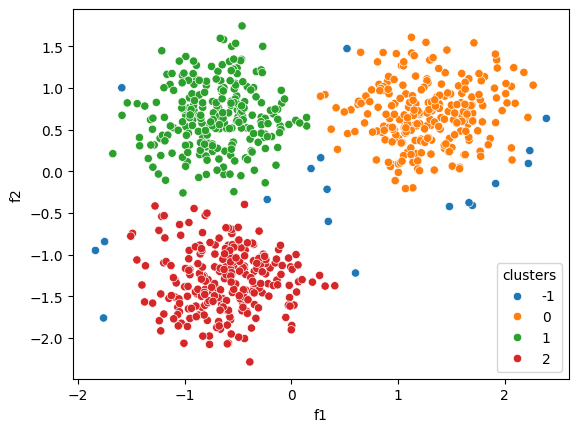

In [15]:
import seaborn as sns

sns.scatterplot(df , x= "f1" , y = "f2" , palette="tab10" ,  hue = "clusters")
